In [3]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

Import Succesfull


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Potato/Potato_Raw data.xlsx")

In [6]:
df.head(10)

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,BHUBANESHWAR_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,RANCHI_Avg. Temperature,Date
0,815.0,2450.0,22231.0,20.1,1758.0,2770.0,32806.0,20.8,776.0,1131.0,7020.0,22.1,607.0,1215.0,34213.0,14.2,1900.0,2544.0,11910.0,22.2,786.0,1271.0,5305.0,15.5,841.0,1142.0,9288.0,19.5,1245.0,2000.0,31379.0,23.7,1394.0,1902.0,16924.0,21.3,802.0,1255.0,5655.0,16.7,2015-01-01
1,576.0,2000.0,17116.0,22.8,1569.0,2592.0,21241.0,22.9,583.0,853.0,9880.0,24.9,525.0,1035.0,31006.0,16.9,1382.0,1935.0,4426.0,24.8,718.0,1162.0,4294.0,18.0,583.0,818.0,14427.0,22.0,1084.0,1855.0,32856.0,23.9,1258.0,1755.0,7364.0,23.1,699.0,1208.0,6115.0,19.0,2015-02-01
2,348.0,1550.0,22966.0,27.1,1246.0,2274.0,22587.0,25.5,509.0,731.0,9425.0,28.4,523.0,992.0,31200.0,22.6,1120.0,1680.0,5052.0,28.4,657.0,1077.0,14936.0,23.5,463.0,754.0,13086.0,27.0,1019.0,1982.0,31267.0,26.2,1020.0,1465.0,6916.0,26.3,440.0,933.0,6340.0,23.9,2015-03-01
3,318.0,1473.0,7729.0,31.2,1153.0,2105.0,22022.0,27.1,556.0,770.0,8875.0,30.8,430.0,804.0,26756.0,28.4,1071.0,1588.0,6342.0,31.4,492.0,867.0,21141.0,29.0,569.0,812.0,11835.0,29.9,716.0,1052.0,30272.0,28.1,802.0,1160.0,8707.0,29.0,429.0,817.0,6180.0,28.4,2015-04-01
4,381.0,1463.0,8255.0,33.4,1004.0,2050.0,23161.0,26.9,650.0,885.0,10550.0,31.7,450.0,1032.0,27740.0,33.3,1410.0,2081.0,7208.0,33.3,481.0,813.0,15074.0,33.0,627.0,908.0,6183.0,30.4,769.0,1313.0,27165.0,29.7,1056.0,1537.0,11301.0,29.6,437.0,835.0,6395.0,31.1,2015-05-01
5,513.0,1500.0,5256.0,32.6,1048.0,2091.0,22649.0,24.4,706.0,953.0,7080.0,30.6,1097.0,1724.0,21052.0,34.1,1358.0,1992.0,5998.0,29.8,522.0,805.0,14319.0,33.1,NaN,NaN,NaN,29.7,853.0,1217.0,22746.0,28.9,1117.0,1677.0,10688.0,27.3,599.0,975.0,4040.0,29.1,2015-06-01
6,419.0,1500.0,9134.0,29.4,929.0,2000.0,21285.0,23.3,NaN,NaN,NaN,28.6,1703.0,2308.0,31004.0,31.0,1018.0,1727.0,6072.0,26.7,NaN,NaN,NaN,29.9,NaN,NaN,NaN,28.7,860.0,1512.0,32072.0,27.2,1008.0,1459.0,12873.0,24.8,NaN,NaN,NaN,25.8,2015-07-01
7,434.0,1895.0,10844.0,28.1,863.0,2000.0,27800.0,23.4,NaN,NaN,NaN,28.3,1707.0,2171.0,27543.0,29.7,916.0,1453.0,9218.0,26.7,NaN,NaN,NaN,28.1,NaN,NaN,NaN,28.6,787.0,1412.0,40846.0,26.8,862.0,1240.0,10121.0,24.5,650.0,1000.0,237.0,25.6,2015-08-01
8,482.0,2000.0,9793.0,28.6,786.0,2000.0,23551.0,23.2,NaN,NaN,NaN,28.6,1554.0,2035.0,27512.0,29.1,947.0,1520.0,6894.0,26.3,NaN,NaN,NaN,28.2,NaN,NaN,NaN,28.9,889.0,1295.0,39600.0,27.0,891.0,1303.0,10111.0,24.8,NaN,NaN,NaN,25.5,2015-09-01
9,601.0,2000.0,9578.0,28.4,805.0,2027.0,28165.0,23.1,NaN,NaN,NaN,27.7,1812.0,2305.0,29552.0,25.7,1000.0,1536.0,7330.0,25.9,NaN,NaN,NaN,26.1,NaN,NaN,NaN,27.4,1027.0,1643.0,34370.0,28.0,1018.0,1368.0,7150.0,25.5,1831.0,2444.0,384.0,23.5,2015-10-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AHMEDABAD_WholesalePrice       26 non-null     float64       
 1   AHMEDABAD_RetailPrice          26 non-null     float64       
 2   AHMEDABAD_Volume               26 non-null     float64       
 3   AHMEDABAD_Avg. Temperature     67 non-null     float64       
 4   Bengaluru_WholesalePrice       65 non-null     float64       
 5   Bengaluru_RetailPrice          65 non-null     float64       
 6   Bengaluru_Volume               65 non-null     float64       
 7   Bengaluru_Avg. Temperature     67 non-null     float64       
 8   BHUBANESHWAR_WholesalePrice    29 non-null     float64       
 9   BHUBANESHWAR_RetailPrice       29 non-null     float64       
 10  BHUBANESHWAR_Volume            29 non-null     float64       
 11  BHUBANESHWAR_Avg. Tem

In [8]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 67
Columns  : 41

 Features 
 ['AHMEDABAD_WholesalePrice', 'AHMEDABAD_RetailPrice', 'AHMEDABAD_Volume', 'AHMEDABAD_Avg. Temperature', 'Bengaluru_WholesalePrice', 'Bengaluru_RetailPrice', 'Bengaluru_Volume', 'Bengaluru_Avg. Temperature', 'BHUBANESHWAR_WholesalePrice', 'BHUBANESHWAR_RetailPrice', 'BHUBANESHWAR_Volume', 'BHUBANESHWAR_Avg. Temperature', 'DELHI_WholesalePrice', 'DELHI_RetailPrice', 'DELHI_Volume', 'DELHI_Avg. Temperature', 'HYDERABAD_WholesalePrice', 'HYDERABAD_RetailPrice', 'HYDERABAD_Volume', 'HYDERABAD_Avg. Temperature', 'JAIPUR_WholesalePrice', 'JAIPUR_RetailPrice', 'JAIPUR_Volume', 'JAIPUR_Avg. Temperature', 'KOLKATA_WholesalePrice', 'KOLKATA_RetailPrice', 'KOLKATA_Volume', 'KOLKATA_Avg. Temperature', 'MUMBAI_WholesalePrice', 'MUMBAI_RetailPrice', 'MUMBAI_Volume', 'MUMBAI A_Avg. Temperature', 'PUNE_WholesalePrice', 'PUNE_RetailPrice', 'PUNE_Volume', 'PUNE_Avg. Temperature', 'RANCHI_WholesalePrice', 'RANCHI_RetailPrice', 'RANCHI_Volume', 'RANCHI_Avg. Temperat

In [9]:
df.describe()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,BHUBANESHWAR_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,RANCHI_Avg. Temperature
count,26.000000,26.000000,26.000000,67.000000,65.000000,65.000000,65.000000,67.000000,29.000000,29.000000,29.000000,67.000000,63.000000,63.000000,63.000000,67.000000,41.000000,41.000000,41.000000,67.000000,45.000000,45.000000,45.000000,67.000000,33.000000,33.000000,33.000000,67.000000,64.000000,64.000000,64.000000,67.000000,65.000000,65.000000,65.000000,67.000000,46.000000,46.000000,46.000000,67.000000
mean,585.730769,1744.653846,12393.153846,27.352239,1328.061538,2509.276923,23548.600000,23.677612,835.965517,1185.068966,6228.793103,27.441791,1091.873016,1997.396825,29394.111111,25.134328,1314.121951,2460.365854,6529.219512,26.822388,766.622222,1433.111111,10661.311111,25.208955,937.545455,1332.272727,5861.787879,26.294030,1206.593750,1928.750000,48079.484375,26.801493,1305.538462,2022.615385,12651.676923,25.117910,1179.000000,1775.195652,6551.826087,23.843284
std,222.589588,327.014733,7977.492246,4.259512,355.482106,426.735629,5316.867231,2.041080,358.461742,405.241016,3147.946228,3.166355,535.843275,824.003319,5791.397973,6.827763,391.279324,785.437259,4954.368373,3.514163,275.451471,437.861239,7054.803869,6.069789,403.512011,469.971626,3551.196249,3.924202,349.974045,533.358065,29151.543550,1.827193,389.002975,733.552778,3462.741229,2.659171,578.190395,707.181561,2759.494103,4.698847
min,318.000000,1396.000000,1286.000000,20.100000,786.000000,1907.000000,4272.000000,20.700000,414.000000,731.000000,230.000000,21.900000,363.000000,787.000000,14118.000000,14.200000,700.000000,1439.000000,86.000000,21.500000,375.000000,800.000000,201.000000,15.500000,413.000000,754.000000,216.000000,19.500000,638.000000,1052.000000,1940.000000,23.700000,701.000000,1003.000000,5154.000000,21.100000,429.000000,817.000000,190.000000,16.700000
25%,414.500000,1500.000000,5874.250000,23.650000,1048.000000,2170.000000,21476.000000,22.900000,556.000000,904.000000,4180.000000,24.900000,622.000000,1306.000000,26868.500000,18.450000,975.000000,1982.000000,1034.000000,24.800000,522.000000,1100.000000,5305.000000,19.250000,583.000000,908.000000,3598.000000,22.650000,896.750000,1500.000000,30065.750000,25.650000,1000.000000,1476.000000,10234.000000,23.100000,799.000000,1262.000000,5965.750000,19.150000
50%,497.500000,1583.000000,10318.500000,28.400000,1267.000000,2482.000000,23937.000000,23.300000,757.000000,1011.000000,7080.000000,28.400000,949.000000,1919.000000,29159.000000,28.400000,1231.000000,2225.000000,6400.000000,26.700000,718.000000,1388.000000,11729.000000,28.100000,841.000000,1200.000000,5220.000000,28.600000,1153.500000,1973.000000,39215.000000,27.000000,1258.000000,1910.000000,12483.000000,24.800000,947.000000,1556.000000,6602.500000,25.500000
75%,726.250000,2000.000000,20715.750000,31.200000,1563.000000,2770.000000,26396.000000,25.500000,1023.000000,1448.000000,8380.000000,30.600000,1517.500000,2553.500000,32113.500000,31.000000,1673.000000,3000.000000,11148.000000,29.800000,1020.000000,1836.000000,15074.000000,29.900000,1126.000000,1718.000000,7623.000000,29.700000,1487.250000,2157.000000,58362.500000,28.100000,1588.000000,2350.000000,15251.000000,27.300000,1582.000000,2290.000000,7960.000000,28.400000
max,1105.00

# Handling Missing values

In [10]:
df.isnull().sum()

AHMEDABAD_WholesalePrice         41
AHMEDABAD_RetailPrice            41
AHMEDABAD_Volume                 41
AHMEDABAD_Avg. Temperature        0
Bengaluru_WholesalePrice          2
Bengaluru_RetailPrice             2
Bengaluru_Volume                  2
Bengaluru_Avg. Temperature        0
BHUBANESHWAR_WholesalePrice      38
BHUBANESHWAR_RetailPrice         38
BHUBANESHWAR_Volume              38
BHUBANESHWAR_Avg. Temperature     0
DELHI_WholesalePrice              4
DELHI_RetailPrice                 4
DELHI_Volume                      4
DELHI_Avg. Temperature            0
HYDERABAD_WholesalePrice         26
HYDERABAD_RetailPrice            26
HYDERABAD_Volume                 26
HYDERABAD_Avg. Temperature        0
JAIPUR_WholesalePrice            22
JAIPUR_RetailPrice               22
JAIPUR_Volume                    22
JAIPUR_Avg. Temperature           0
KOLKATA_WholesalePrice           34
KOLKATA_RetailPrice              34
KOLKATA_Volume                   34
KOLKATA_Avg. Temperature    

In [11]:
df.isnull()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,BHUBANESHWAR_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,RANCHI_Avg. Temperature,Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
63,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,False
64,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True,True,True,False,False
65,True,True,True,False,False,False,False,False,True,True,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False


In [12]:
df1=df.drop('Date',axis=1)

In [13]:
#fill NA with mean() of each column in Potato dataset
df1 = df1.apply(lambda x: x.fillna(x.mean()),axis=0)

# Merge Date and Imputed columns 

In [14]:
df2 = pd.concat([df1, df.Date], axis=1)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AHMEDABAD_WholesalePrice       67 non-null     float64       
 1   AHMEDABAD_RetailPrice          67 non-null     float64       
 2   AHMEDABAD_Volume               67 non-null     float64       
 3   AHMEDABAD_Avg. Temperature     67 non-null     float64       
 4   Bengaluru_WholesalePrice       67 non-null     float64       
 5   Bengaluru_RetailPrice          67 non-null     float64       
 6   Bengaluru_Volume               67 non-null     float64       
 7   Bengaluru_Avg. Temperature     67 non-null     float64       
 8   BHUBANESHWAR_WholesalePrice    67 non-null     float64       
 9   BHUBANESHWAR_RetailPrice       67 non-null     float64       
 10  BHUBANESHWAR_Volume            67 non-null     float64       
 11  BHUBANESHWAR_Avg. Tem

In [16]:
df2.head()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,BHUBANESHWAR_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,RANCHI_Avg. Temperature,Date
0,815.0,2450.0,22231.0,20.1,1758.0,2770.0,32806.0,20.8,776.0,1131.0,7020.0,22.1,607.0,1215.0,34213.0,14.2,1900.0,2544.0,11910.0,22.2,786.0,1271.0,5305.0,15.5,841.0,1142.0,9288.0,19.5,1245.0,2000.0,31379.0,23.7,1394.0,1902.0,16924.0,21.3,802.0,1255.0,5655.0,16.7,2015-01-01
1,576.0,2000.0,17116.0,22.8,1569.0,2592.0,21241.0,22.9,583.0,853.0,9880.0,24.9,525.0,1035.0,31006.0,16.9,1382.0,1935.0,4426.0,24.8,718.0,1162.0,4294.0,18.0,583.0,818.0,14427.0,22.0,1084.0,1855.0,32856.0,23.9,1258.0,1755.0,7364.0,23.1,699.0,1208.0,6115.0,19.0,2015-02-01
2,348.0,1550.0,22966.0,27.1,1246.0,2274.0,22587.0,25.5,509.0,731.0,9425.0,28.4,523.0,992.0,31200.0,22.6,1120.0,1680.0,5052.0,28.4,657.0,1077.0,14936.0,23.5,463.0,754.0,13086.0,27.0,1019.0,1982.0,31267.0,26.2,1020.0,1465.0,6916.0,26.3,440.0,933.0,6340.0,23.9,2015-03-01
3,318.0,1473.0,7729.0,31.2,1153.0,2105.0,22022.0,27.1,556.0,770.0,8875.0,30.8,430.0,804.0,26756.0,28.4,1071.0,1588.0,6342.0,31.4,492.0,867.0,21141.0,29.0,569.0,812.0,11835.0,29.9,716.0,1052.0,30272.0,28.1,802.0,1160.0,8707.0,29.0,429.0,817.0,6180.0,28.4,2015-04-01
4,381.0,1463.0,8255.0,33.4,1004.0,2050.0,23161.0,26.9,650.0,885.0,10550.0,31.7,450.0,1032.0,27740.0,33.3,1410.0,2081.0,7208.0,33.3,481.0,813.0,15074.0,33.0,627.0,908.0,6183.0,30.4,769.0,1313.0,27165.0,29.7,1056.0,1537.0,11301.0,29.6,437.0,835.0,6395.0,31.1,2015-05-01


In [17]:
df2.to_excel('Potato_Cleaned.xlsx', index = False)

In [18]:
print (df2.columns.tolist())

['AHMEDABAD_WholesalePrice', 'AHMEDABAD_RetailPrice', 'AHMEDABAD_Volume', 'AHMEDABAD_Avg. Temperature', 'Bengaluru_WholesalePrice', 'Bengaluru_RetailPrice', 'Bengaluru_Volume', 'Bengaluru_Avg. Temperature', 'BHUBANESHWAR_WholesalePrice', 'BHUBANESHWAR_RetailPrice', 'BHUBANESHWAR_Volume', 'BHUBANESHWAR_Avg. Temperature', 'DELHI_WholesalePrice', 'DELHI_RetailPrice', 'DELHI_Volume', 'DELHI_Avg. Temperature', 'HYDERABAD_WholesalePrice', 'HYDERABAD_RetailPrice', 'HYDERABAD_Volume', 'HYDERABAD_Avg. Temperature', 'JAIPUR_WholesalePrice', 'JAIPUR_RetailPrice', 'JAIPUR_Volume', 'JAIPUR_Avg. Temperature', 'KOLKATA_WholesalePrice', 'KOLKATA_RetailPrice', 'KOLKATA_Volume', 'KOLKATA_Avg. Temperature', 'MUMBAI_WholesalePrice', 'MUMBAI_RetailPrice', 'MUMBAI_Volume', 'MUMBAI A_Avg. Temperature', 'PUNE_WholesalePrice', 'PUNE_RetailPrice', 'PUNE_Volume', 'PUNE_Avg. Temperature', 'RANCHI_WholesalePrice', 'RANCHI_RetailPrice', 'RANCHI_Volume', 'RANCHI_Avg. Temperature', 'Date']


In [19]:
df2 = df2.reindex()

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AHMEDABAD_WholesalePrice       67 non-null     float64       
 1   AHMEDABAD_RetailPrice          67 non-null     float64       
 2   AHMEDABAD_Volume               67 non-null     float64       
 3   AHMEDABAD_Avg. Temperature     67 non-null     float64       
 4   Bengaluru_WholesalePrice       67 non-null     float64       
 5   Bengaluru_RetailPrice          67 non-null     float64       
 6   Bengaluru_Volume               67 non-null     float64       
 7   Bengaluru_Avg. Temperature     67 non-null     float64       
 8   BHUBANESHWAR_WholesalePrice    67 non-null     float64       
 9   BHUBANESHWAR_RetailPrice       67 non-null     float64       
 10  BHUBANESHWAR_Volume            67 non-null     float64       
 11  BHUBANESHWAR_Avg. Tem

# EXPLORATORY DATA ANALYSIS

In [21]:
# Top Ten Mandi Market for Tomato in India
fig = plt.figure(figsize=(20,20))
columns=['AHMEDABAD_Volume','Bengaluru_Volume','BHUBANESHWAR_Volume','DELHI_Volume','HYDERABAD_Volume','JAIPUR_Volume','KOLKATA_Volume','MUMBAI_Volume','PUNE_Volume','RANCHI_Volume']
Volume = df2[columns].sum().round(decimals=1)
Volume.head(10)

AHMEDABAD_Volume        830341.3
Bengaluru_Volume       1577756.2
BHUBANESHWAR_Volume     417329.1
DELHI_Volume           1969405.4
HYDERABAD_Volume        437457.7
JAIPUR_Volume           714307.8
KOLKATA_Volume          392739.8
MUMBAI_Volume          3221325.5
PUNE_Volume             847662.4
RANCHI_Volume           438972.3
dtype: float64

<Figure size 1440x1440 with 0 Axes>

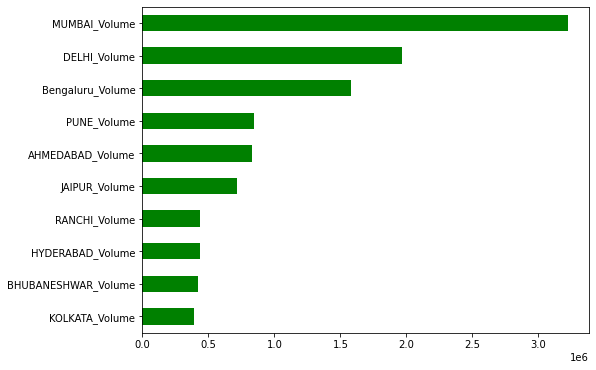

In [22]:
Volume.sort_values(inplace=True)
Volume.plot(kind='barh',y='Mandi Potato Volume from 2015-2020',x='Mandi',color='g')

# Line Plot for wholesale price

In [25]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

MUMBAIWholesale = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_WholesalePrice,
name="MUMBAI")

HYDERABADWholesale = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_WholesalePrice,
name="Hyderabad")

DELHIWholesale = go.Scatter(
x=df2.Date,
y=df2.DELHI_WholesalePrice,
name="Mumbai")

AhmWholesale = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_WholesalePrice,
name="Ahemdabad")

JaipurWholesale = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_WholesalePrice,
name="Jaipur")

BengaluruWholesale = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_WholesalePrice,
name="Bengaluru")

PuneWholesale = go.Scatter(
x=df2.Date,
y=df2.PUNE_WholesalePrice,
name="Pune")

BHUBANESHWARWholesale = go.Scatter(
x=df2.Date,
y=df2.BHUBANESHWAR_WholesalePrice,
name="BHUBANESHWAR")

RANCHIWholesale = go.Scatter(
x=df2.Date,
y=df2.RANCHI_WholesalePrice,
name="RANCHI")

KolWholesale = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_WholesalePrice,
name="Kolkata")

data = [MUMBAIWholesale, HYDERABADWholesale, DELHIWholesale,AhmWholesale,JaipurWholesale,BengaluruWholesale,PuneWholesale,BHUBANESHWARWholesale,RANCHIWholesale,KolWholesale]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)


'temp-plot.html'

# Line plot for Retail price

In [26]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

DelhiRetail = go.Scatter(
x=df2.Date,
y=df2.DELHI_RetailPrice,
name="Delhi")

HyderabadRetail = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_RetailPrice,
name="Hyderabad")

MumbaiRetail = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_RetailPrice,
name="Mumbai")

AhmRetail = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_RetailPrice,
name="Ahemdabad")

JaipurRetail = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_RetailPrice,
name="Jaipur")

BengaluruRetail = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_RetailPrice,
name="Bengaluru")

PuneRetail = go.Scatter(
x=df2.Date,
y=df2.PUNE_RetailPrice,
name="Pune")

BHUBANESHWARRetail = go.Scatter(
x=df2.Date,
y=df2.BHUBANESHWAR_RetailPrice,
name="BHUBANESHWAR")

RANCHIRetail = go.Scatter(
x=df2.Date,
y=df2.RANCHI_RetailPrice,
name="RANCHI")

KolRetail = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_RetailPrice,
name="Kolkata")

data = [DelhiRetail, HyderabadRetail, MumbaiRetail,AhmRetail,JaipurRetail,BengaluruRetail,PuneRetail,BHUBANESHWARRetail,RANCHIRetail,KolRetail]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'